In [12]:
!pip install scikit-learn


  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ------------------- -------------------- 5.2/10.7 MB 31.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.7 MB 21.7 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 24.3 MB/s eta 0:


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\diego\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [2]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Parámetros
img_height, img_width = 128, 128  # Puedes ajustarlo según tu dataset
batch_size = 32
data_dir = "dataset+"  # Ruta a la carpeta que contiene las subcarpetas/clases

# Aumentación para el set de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 0 images belonging to 22 classes.


Found 0 images belonging to 22 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(22, activation='softmax')  # 22 clases
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,522,582 (24.88 MB)

 Trainable params: 6,522,134 (24.88 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5  # Puedes aumentar o ajustar
)


ValueError: The PyDataset has length 0

In [6]:
model.save("modelo_ejercicios.h5")


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predecir_imagen(ruta_imagen, modelo, clases, img_size=(128, 128)):
    img = image.load_img(ruta_imagen, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = modelo.predict(img_array)
    clase = clases[np.argmax(pred)]
    return clase

# Cargar modelo y clases
model = tf.keras.models.load_model("modelo_ejercicios.h5")
clases = list(train_generator.class_indices.keys())

# Ejemplo de uso
print(predecir_imagen(f"C:/Users/Anibal M/Desktop/hito 2 ML/dataset+/incline bench press/incline bench press_100001_fliph.jpg", model, clases))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
lateral raises


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

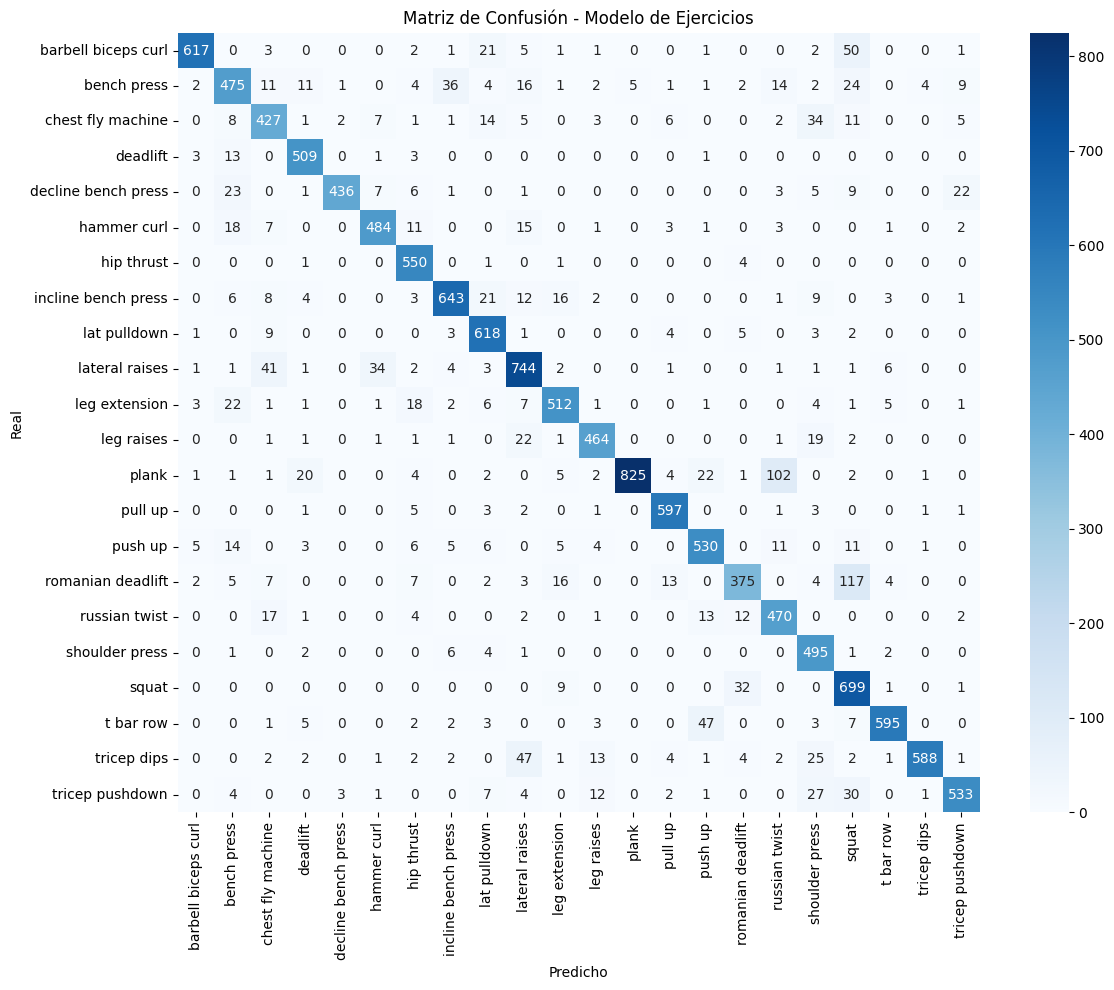

In [4]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar modelo
modelo_ejercicios = load_model("modelo_ejercicios.h5")

# Clases
clases = [
    'barbell biceps curl', 'bench press', 'chest fly machine', 'deadlift',
    'decline bench press', 'hammer curl', 'hip thrust', 'incline bench press',
    'lat pulldown', 'lateral raises', 'leg extension', 'leg raises', 'plank',
    'pull up', 'push up', 'romanian deadlift', 'russian twist', 'shoulder press',
    'squat', 't bar row', 'tricep dips', 'tricep pushdown'
]

# Ruta al set de prueba
test_dir = "dataset+"

# Recolectar datos reales y predicciones
y_true = []
y_pred = []

for etiqueta in os.listdir(test_dir):
    carpeta = os.path.join(test_dir, etiqueta)
    if not os.path.isdir(carpeta): continue
    for archivo in os.listdir(carpeta):
        if not archivo.endswith(".jpg"): continue
        ruta = os.path.join(carpeta, archivo)
        img = image.load_img(ruta, target_size=(128, 128))
        x = np.expand_dims(np.array(img) / 255.0, axis=0)
        pred = modelo_ejercicios.predict(x)
        y_true.append(etiqueta)
        y_pred.append(clases[np.argmax(pred)])

# Reporte
print("=== REPORTE DE EJERCICIOS ===")
print(classification_report(y_true, y_pred, zero_division=0))

# Matriz de confusión
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true, y_pred, labels=clases)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=clases, yticklabels=clases, cmap="Blues")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Matriz de Confusión - Modelo de Ejercicios")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


=== REPORTE DE EJERCICIOS ===
                     precision    recall  f1-score   support

barbell biceps curl       0.97      0.88      0.92       705
        bench press       0.80      0.76      0.78       625
  chest fly machine       0.80      0.81      0.80       527
           deadlift       0.90      0.96      0.93       530
decline bench press       0.99      0.85      0.91       514
        hammer curl       0.90      0.89      0.89       546
         hip thrust       0.87      0.99      0.93       557
incline bench press       0.91      0.88      0.90       729
       lat pulldown       0.86      0.96      0.91       646
     lateral raises       0.84      0.88      0.86       843
      leg extension       0.90      0.87      0.89       586
         leg raises       0.91      0.90      0.91       514
              plank       0.99      0.83      0.91       993
            pull up       0.94      0.97      0.96       615
            push up       0.86      0.88      0.87    

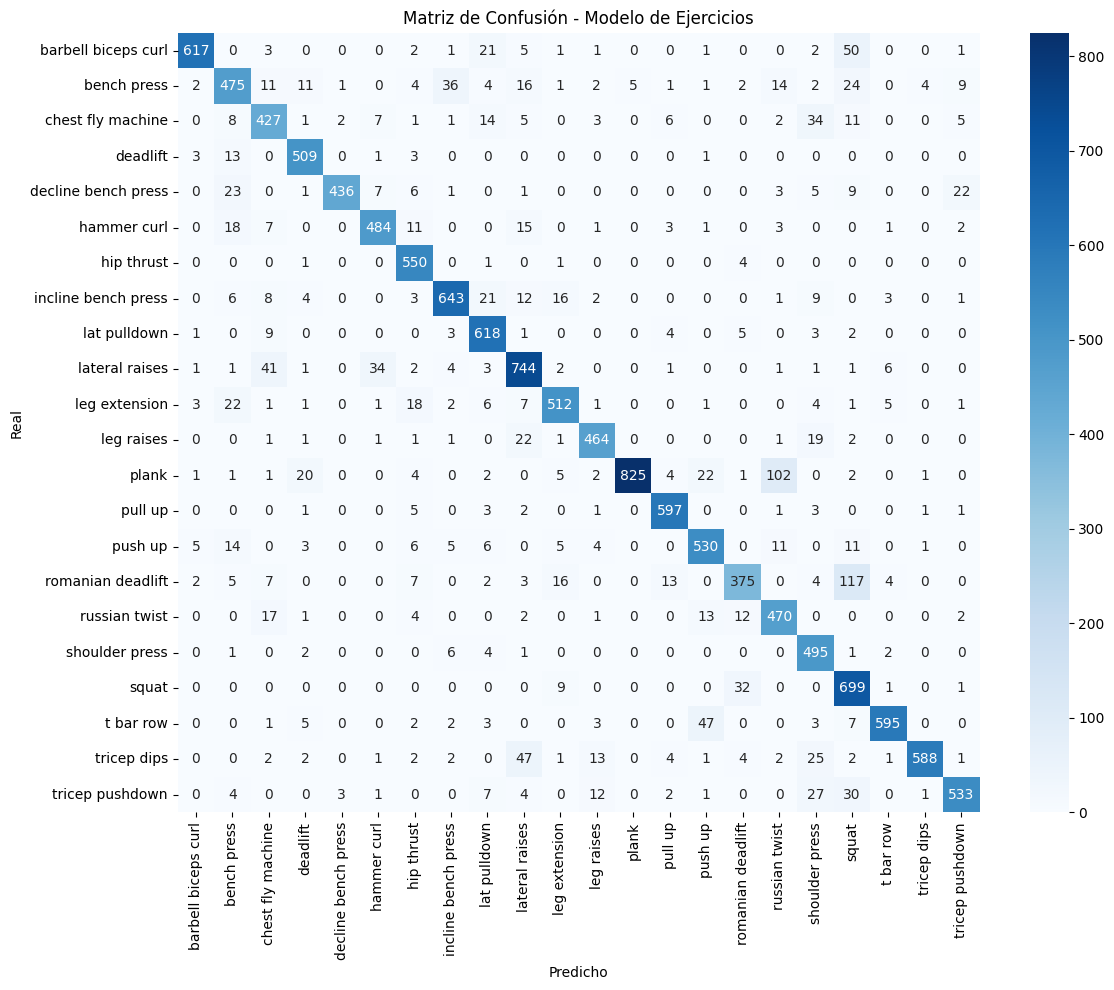

In [5]:
print("=== REPORTE DE EJERCICIOS ===")
print(classification_report(y_true, y_pred, zero_division=0))

# Matriz de confusión
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true, y_pred, labels=clases)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=clases, yticklabels=clases, cmap="Blues")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Matriz de Confusión - Modelo de Ejercicios")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.tight_layout()
plt.show()